In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot  as plt
%matplotlib inline

from IPython.display import display

In [2]:
dataset = pd.read_csv('../datasets/Data.csv')
X_raw = dataset.iloc[ : , :-1]
y_raw = dataset.iloc[ : , -1]

In [3]:
# 查看对象
print('type(X_raw) = {}'.format(type(X_raw)))
print('X_raw.shape = {}'.format(X_raw.shape))

type(X_raw) = <class 'pandas.core.frame.DataFrame'>
X_raw.shape = (10, 3)


In [4]:
# 查看简略信息
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null object
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


In [5]:
# 查看包含缺失项的内容
display(dataset[dataset.isnull().any(axis=1)])
# 查看数据特性， Age 和 Salary 各有一项nan，所以count = 10 - 1
display(dataset.describe())

,Country,Age,Salary,Purchased
4,Germany,40.0,NaN,Yes
6,Spain,NaN,52000.0,No


,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


# 标准差（StandardDeviation）:

* 如是总体（即估算总体方差），根号内除以n（对应excel函数：STDEVP）；

 numpy.std(numpy.ndarray) 对总体使用根号内除以n
 
 
* 如是抽样（即估算样本方差），根号内除以（n-1）（对应excel函数：STDEV）；

 pandas.DataFrame.std() 对样本使用根号内除以(n-1)


 因为我们大量接触的是样本，所以普遍使用根号内除以（n-1）。


[参考资料](https://www.shuxuele.com/data/standard-deviation.html)

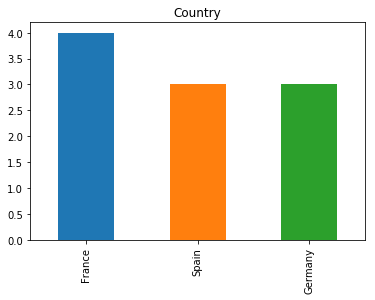

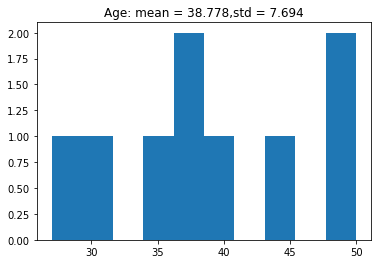

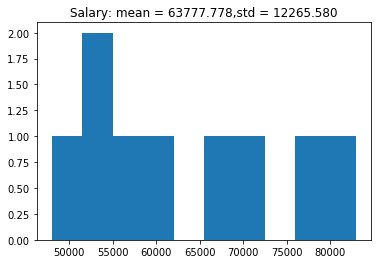

In [6]:
#作图查看数据
#display function
def series_hist(ser, std='series'):
    ser = ser.dropna()
    if ser.dtype == np.float64:        
        plt.hist(ser)
        if std == 'series':            
            plt.title('{}: mean = {:.3f},std = {:.3f}'.format(ser.name, ser.mean(), ser.std()))
        elif std == 'numpy':
            plt.title('{}: mean = {:.3f},std = {:.3f}'.format(ser.name, ser.mean(), np.std(ser)))
        else:
            plt.title('{}: mean = {:.3f}'.format(ser.name, ser.mean()))
        plt.show()
    else:            
        ser.value_counts().plot(kind = 'bar') 
        plt.title('{}'.format(ser.name))
        plt.show()

def plt_data(df, std='series'):
    if isinstance(df, pd.Series):
        series_hist(df, std)
    elif isinstance(df, pd.DataFrame):
        for col in df.columns: 
            series_hist(df[col], std)
    else:
        print('Only Support pandas.DataFrame or pandas.Series Object!')


plt_data(X_raw)

[v0.17 sklearn.preprocessing.Imputer](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.preprocessing.Imputer.html)

[v0.20.1 sklearn.impute.SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

D:\ProgramData\envs\tfpy371\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


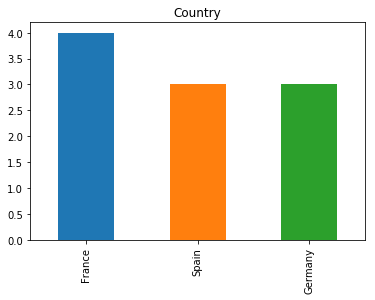

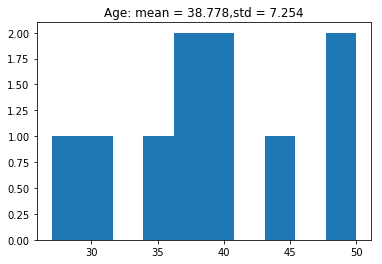

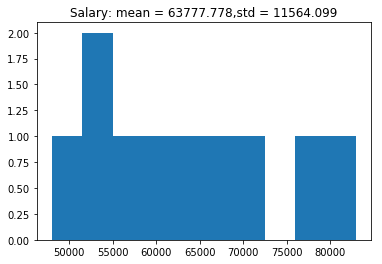

In [7]:
from sklearn.preprocessing import Imputer
X_done = X_raw
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X_raw.iloc[: ,1:3])
X_done.iloc[: ,1:3] = imputer.transform(X_raw.iloc[: ,1:3])
plt_data(X_done)

[v0.17 sklearn.preprocessing.LabelEncoder](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.preprocessing.LabelEncoder.html)

[v0.20.1 sklearn.preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

[v0.17 sklearn.preprocessing.OneHotEncoder](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

[v0.20.1 sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X_np = X_done.values
labelencoder = LabelEncoder()
X_np[ : , 0] = labelencoder.fit_transform(X_np[ : , 0])

display(np.unique(X_done.iloc[: , 0]))
display(X_done.iloc[ : , 0].values)
display(X_np[ : , 0])

array(['France', 'Germany', 'Spain'], dtype=object)

array(['France', 'Spain', 'Germany', 'Spain', 'Germany', 'France',
       'Spain', 'France', 'Germany', 'France'], dtype=object)

array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0], dtype=object)

In [9]:
onehotencoder = OneHotEncoder(categorical_features = [0])
X_onehot = onehotencoder.fit_transform(X_np).toarray()
display(X_np[ : , 0])
display(X_onehot[ : ,:3])
display('X_onehot.shape = {}'.format(X_onehot.shape))

D:\ProgramData\envs\tfpy371\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\ProgramData\envs\tfpy371\lib\site-packages\sklearn\preprocessing\_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0], dtype=object)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

'X_onehot.shape = (10, 5)'

In [10]:
labelencode = LabelEncoder()
y_label = labelencoder.fit_transform(y_raw)
display(np.unique(y_raw))
display(y_raw.values)
display(y_label)

array(['No', 'Yes'], dtype=object)

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

# 用pandas.get_dummies(pandas.DataFrame)实现OneHotEncoder

[pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

In [11]:
X_dummies = pd.get_dummies(X_done)
y_dummies = pd.get_dummies(y_raw)
display(X_dummies)
display(y_dummies)

,Age,Salary,Country_France,Country_Germany,Country_Spain
0,44.000000,72000.000000,1,0,0
1,27.000000,48000.000000,0,0,1
2,30.000000,54000.000000,0,1,0
3,38.000000,61000.000000,0,0,1
4,40.000000,63777.777778,0,1,0
5,35.000000,58000.000000,1,0,0
6,38.777778,52000.000000,0,0,1
7,48.000000,79000.000000,1,0,0
8,50.000000,83000.000000,0,1,0
9,37.000000,67000.000000,1,0,0


,No,Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
5,0,1
6,1,0
7,0,1
8,1,0
9,0,1


[v0.20.1 sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_dummies, test_size = 0.2, random_state = 0)
print('X_train.shape = {}'.format(X_train.shape))
print('X_test.shape = {}'.format(X_test.shape))
print('y_train.shape = {}'.format(y_train.shape))
print('y_test.shape = {}'.format(y_test.shape))

X_train.shape = (8, 5)
X_test.shape = (2, 5)
y_train.shape = (8, 2)
y_test.shape = (2, 2)


[v0.20.1 sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

[pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame)

D:\ProgramData\envs\tfpy371\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\ProgramData\envs\tfpy371\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\ProgramData\envs\tfpy371\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


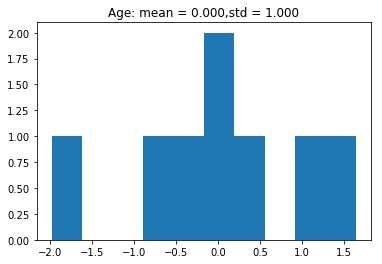

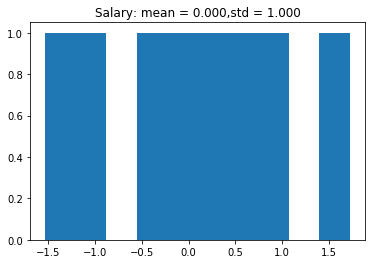

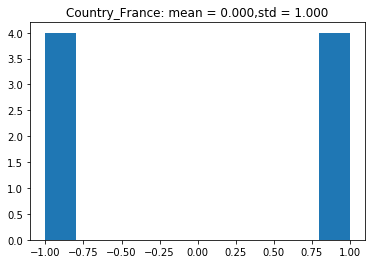

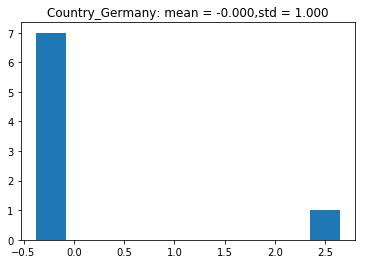

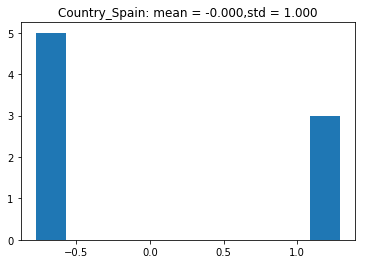

In [13]:
from sklearn.preprocessing import StandardScaler
standarscaler = StandardScaler()
X_sc_train = standarscaler.fit_transform(X_train)
X_sc_test = standarscaler.transform(X_test)

X_df_train = pd.DataFrame(X_sc_train, columns=X_train.columns)
plt_data(X_df_train, std='numpy')

## 参考资料:
[ML 入门：归一化、标准化和正则化](https://zhuanlan.zhihu.com/p/29957294)